# **120 years of olympics history**

Dataset link : [120_years_of_olympics_history](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

## Dataset Description

This dataset contains historical data on the modern Olympic Games from their beginning in Athens in 1896 up to Rio in 2016.

* This dataset incldes both **summer** and **winter** olympics
* Covers every eddition of olympics from **1896 to 2016**


Before **1992**, both **summer** and **winter** olympics were held in **same year**:
* 1988: Summer in Seoul, Winter in Calgary
* 1992: Summer in Barcelona, Winter in Albertville

Starting from **1994**, the IOC **staggered** the Olympics:
* Winter Games occur every 4 years starting in 1994
* Summer Games continue every 4 years from 1996
* So it alternates every 2 years between Winter and Summer

## **Datasets Understanding**

### Reading the data

In [30]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

if os.path.exists("./datasets/athlete_events.csv"):
    print("yes")
else:
    print("no")

yes


In [7]:
olympics = pd.read_csv('./datasets/athlete_events.csv')
regions = pd.read_csv('./datasets/noc_regions.csv')

In [8]:
olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [9]:
regions.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [10]:
# shape of the data

print(f"Number of rows of the olympics data: {olympics.shape[0]}")
print(f"Number of cols of the olympics data: {olympics.shape[1]}")

Number of rows of the olympics data: 271116
Number of cols of the olympics data: 15


In [11]:
print(f"Number of rows of the olympics data: {regions.shape[0]}")
print(f"Number of cols of the olympics data: {regions.shape[1]}")

Number of rows of the olympics data: 230
Number of cols of the olympics data: 3


In [12]:
## columns of the data

## olympics
olympics.columns.tolist()

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [13]:
## regions
regions.columns.tolist()

['NOC', 'region', 'notes']

### **Description of the columns**

* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Name of the Sport
* Event - Specific event name in that sport
* Medal - Gold, Silver, Bronze, or NA

## **Understanding the data**

In [14]:
# info of the data

olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [15]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


Column types

For "Olympics data"
* Numerical: ID, Age, Height, Weight
* Categorical: Sex, Team, NOC, Year, Season, City, Sport, Medal
* Mixed:  Name, Games, Event

For "Regions data"
* Categorical: NOC, region
* Mixed: notes

### Combining the dataframes

In [16]:
athletes = olympics.merge(regions, how = "left", on = "NOC")

athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [17]:
# observing the combined dataset size

print(f"Number of rows of the olympics data: {athletes.shape[0]}")
print(f"Number of cols of the olympics data: {athletes.shape[1]}")

Number of rows of the olympics data: 271116
Number of cols of the olympics data: 17


In [18]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


## **Univariate Analysis**

### **ID**

It is the id of the player

In [19]:
athletes['ID'] = athletes['ID'].astype('str')

In [20]:
# value counts of each player

athletes['ID'].value_counts()

ID
77710     58
106296    39
115354    38
119591    36
53240     32
          ..
135569     1
135568     1
135566     1
135564     1
135562     1
Name: count, Length: 135571, dtype: int64

It gives the count of number of times each player plays from the year 1896 to 2016

In [21]:
# top 20 frequent attempted players

athletes['ID'].value_counts().sort_values(ascending=False).head(20)

ID
77710     58
106296    39
115354    38
119591    36
53240     32
129196    32
119590    32
44875     32
89187     32
55047     31
76437     31
83312     31
106156    31
94406     30
133279    30
120051    30
21462     29
89755     29
74532     28
11951     27
Name: count, dtype: int64

In [22]:
# checking the player details

olympics[olympics['ID'] == 11951]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22698,11951,Ole Einar Bjrndalen,M,20.0,178.0,65.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
22699,11951,Ole Einar Bjrndalen,M,20.0,178.0,65.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 20 kilometres,NaN
22700,11951,Ole Einar Bjrndalen,M,20.0,178.0,65.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
22701,11951,Ole Einar Bjrndalen,M,24.0,178.0,65.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Men's 10 kilometres Sprint,Gold
22702,11951,Ole Einar Bjrndalen,M,24.0,178.0,65.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Men's 20 kilometres,NaN
22703,11951,Ole Einar Bjrndalen,M,24.0,178.0,65.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,Silver
22704,11951,Ole Einar Bjrndalen,M,28.0,178.0,65.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Men's 10 kilometres Sprint,Gold
22705,11951,Ole Einar Bjrndalen,M,28.0,178.0,65.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Men's 12.5 kilometres Pursuit,Gold
22706,11951,Ole Einar Bjrndalen,M,28.0,178.0,65.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Men's 20 kilometres,Gold
22707,11951,Ole Einar Bjrndalen,M,28.0,178.0,65.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,Gold


C:\Users\ptpl-652\AppData\Local\Temp\ipykernel_2224\1002526078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


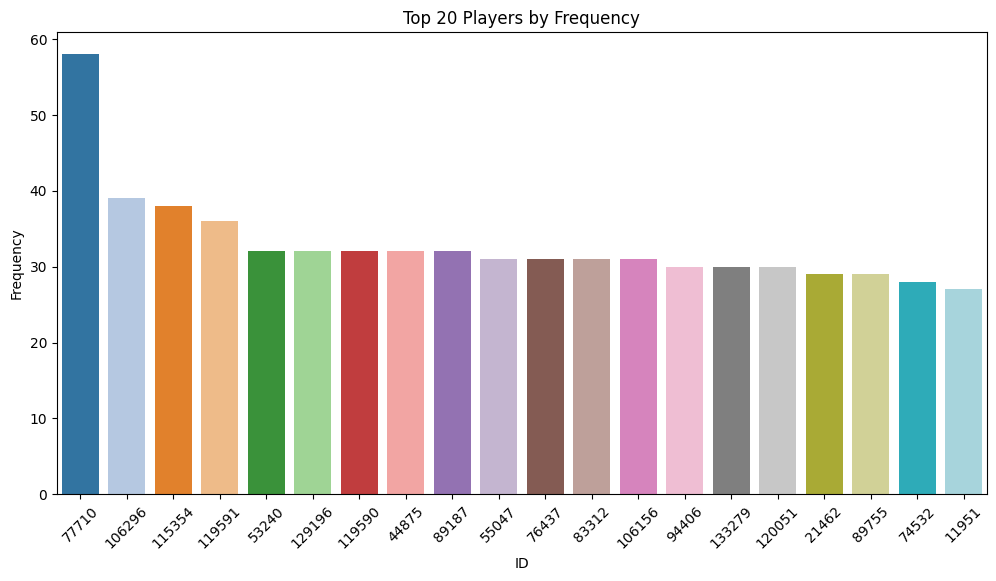

In [23]:
# visualyzing the frequency
top_20_freq_players_count = athletes['ID'].value_counts().head(20).reset_index()
top_20_freq_players_count.columns = ['ID', 'Frequency']

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_freq_players_count,
    x='ID',
    y='Frequency',
    palette='tab20'
)
plt.title("Top 20 Players by Frequency")
plt.xticks(rotation=45)
plt.show()

In [24]:
# finding the number of players who played only one time

freq_count = athletes['ID'].value_counts()

print(f"Number of atheletes who played for one time are: {sum(freq_count == 1)}")

Number of atheletes who played for one time are: 77901


C:\Users\ptpl-652\AppData\Local\Temp\ipykernel_2224\3901862033.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


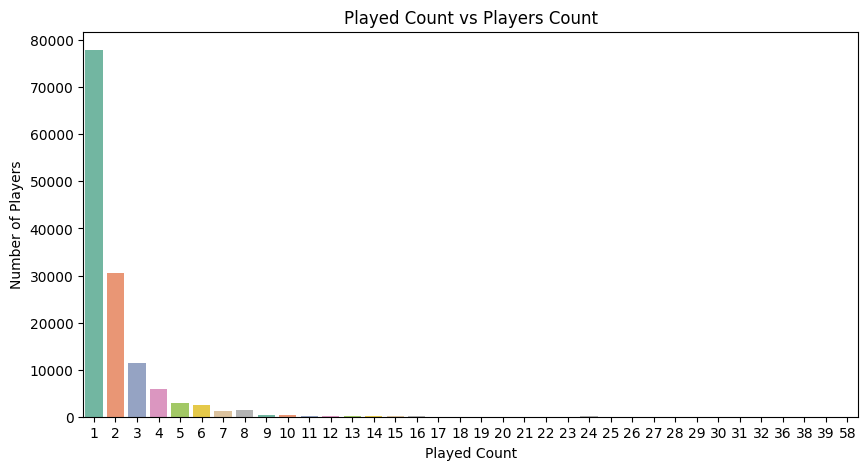

In [25]:
# visualization of number of times palyed palyers

total_freq_count = athletes['ID'].value_counts().reset_index()
freq = total_freq_count.groupby('count')['ID'].count().reset_index()
freq.columns = ['played_count', 'id_count']

freq['played_count'] = freq['played_count'].astype('str')

plt.figure(figsize=(10, 5))
sns.barplot(
    data=freq,
    x='played_count',
    y='id_count',
    palette='Set2'
)
plt.title("Played Count vs Players Count")
plt.xlabel("Played Count")
plt.ylabel("Number of Players")
plt.show()

In [26]:
# identifying the null valued ids

print(f"number of null values in id column is : {athletes['ID'].isnull().sum()}")
print(f"percentage of null values in id column : {round(athletes['ID'].isnull().sum()/len(athletes['ID'])*100, 2)}%")

number of null values in id column is : 0
percentage of null values in id column : 0.0%


**conclusion**

* There are no null values in the id column
* The most frequent player is with id number "77710", played 58 times
* showed the top 20 frequent players in olympics from 1896 to 2016
* showed the distribution of played count vs player count

### **Name**

In [27]:
# finding the null values

print(f"number of null values in id column is : {athletes['Name'].isnull().sum()}")
print(f"percentage of null values in id column : {round(athletes['Name'].isnull().sum()/len(athletes['Name'])*100, 2)}%")

number of null values in id column is : 0
percentage of null values in id column : 0.0%


There are no null values in the Name column

### **Sex**

In [28]:
# counts of males and females

athletes['Sex'].value_counts()

Sex
M    196594
F     74522
Name: count, dtype: int64

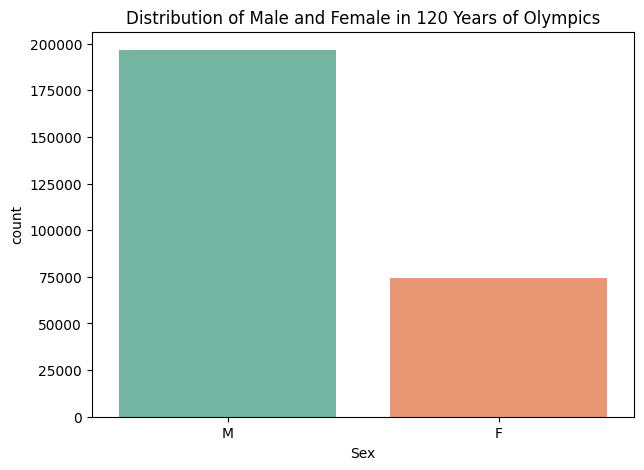

In [31]:
# distribution of male and female participants

gender_count = athletes['Sex'].value_counts().reset_index()

plt.figure(figsize=(7, 5))
sns.countplot(data=athletes, x='Sex', palette='Set2')
plt.title("Distribution of Male and Female in 120 Years of Olympics")
plt.show()

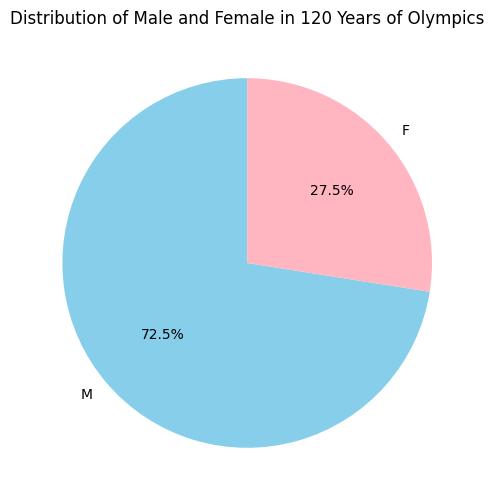

In [32]:
# pie plot for same distributon

plt.figure(figsize=(6, 6))
plt.pie(
    gender_count['count'],
    labels=gender_count['Sex'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightpink']
)
plt.title("Distribution of Male and Female in 120 Years of Olympics")
plt.show()

In [33]:
# Null values and their percentages in Sex column

print(f"number of null values in Sex column is : {athletes['Sex'].isnull().sum()}")
print(f"percentage of null values in Sex column : {round(athletes['Sex'].isnull().sum()/len(athletes['Sex'])*100, 2)}%")

number of null values in Sex column is : 0
percentage of null values in Sex column : 0.0%


There are no null values in Sex column

### **Age**

In [34]:
# describing the Age

athletes['Age'].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

* Min age is: 10
* Max age is: 97
* 75% age is: <= 28
* mean age is: 25

so more that half athletes were in the age <= 28

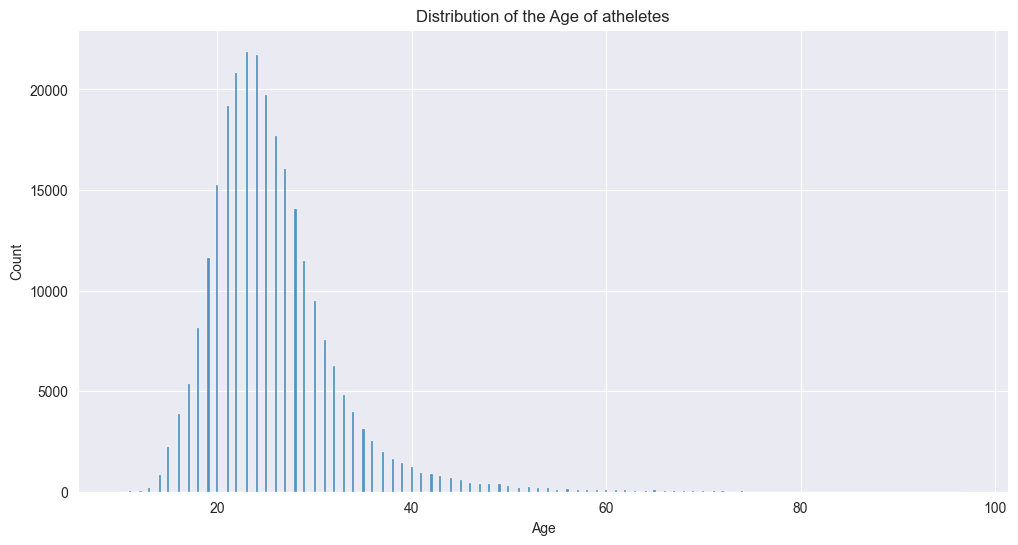

In [35]:
# Atheletes age distribution

sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.histplot(athletes['Age'])
plt.title("Distribution of the Age of atheletes")
plt.show()

Age distribution is maximum between 20 and 40

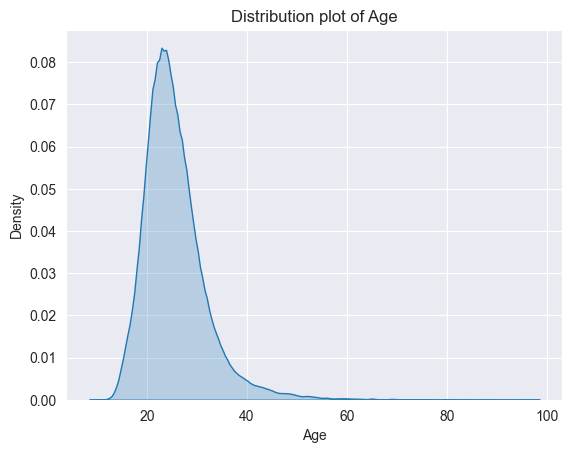

In [36]:
sns.kdeplot(data=athletes, x='Age', fill=True)
plt.title("Distribution plot of Age")
plt.show()

Data is positively skewed

In [37]:
# skewness of the age data

print(f"skewness of the Age data: {athletes['Age'].skew()}")

skewness of the Age data: 1.7471225377871373


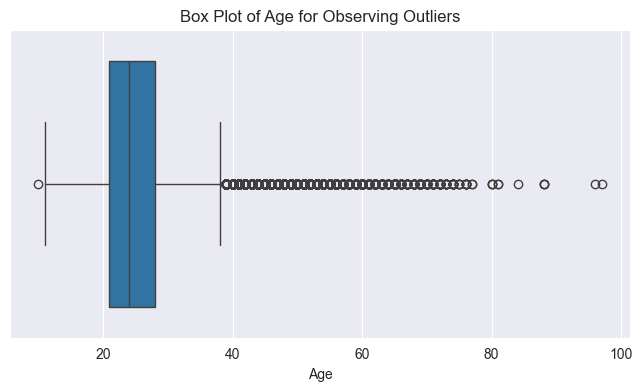

In [39]:
# outliers of the data

plt.figure(figsize=(8, 4))
sns.boxplot(x=athletes['Age'])
plt.title("Box Plot of Age for Observing Outliers")
plt.show()

So the atheletes, whose age is > 38 were considered as outliers

But the max age is 97, which is a general age, so all ages can be considered

In [40]:
print(f"Count of people whose age is more that 38: {athletes[athletes['Age']>38].shape[0]}")

Count of people whose age is more that 38: 10316


In [41]:
# Finding Null values in age column

print(f"number of null values in age column is : {athletes['Age'].isnull().sum()}")
print(f"percentage of null values in age column : {round(athletes['Age'].isnull().sum()/len(athletes['Age'])*100, 2)}%")

number of null values in age column is : 9474
percentage of null values in age column : 3.49%


There are 9474 Null values in the age column

So, we can replace it by using the mean value(i.e, 25), as distribution is mostly lied between and 20 and 30 years.

Or simply eliminate the null valued data

### **Height**

In [42]:
# describing the height (height in cm)

athletes['Height'].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

* min height is: 127cm (4.1 feet)
* max height is: 226cm (7.4 feet)
* more that 75% people height is: 183cm (6.0 feet)
* mean height is: 175cm (5.7 feet)

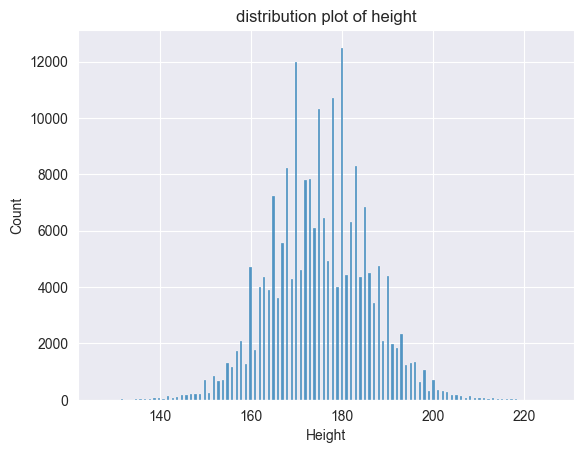

In [43]:
# distribution of height

sns.histplot(athletes['Height'])
plt.title("distribution plot of height")
plt.show()

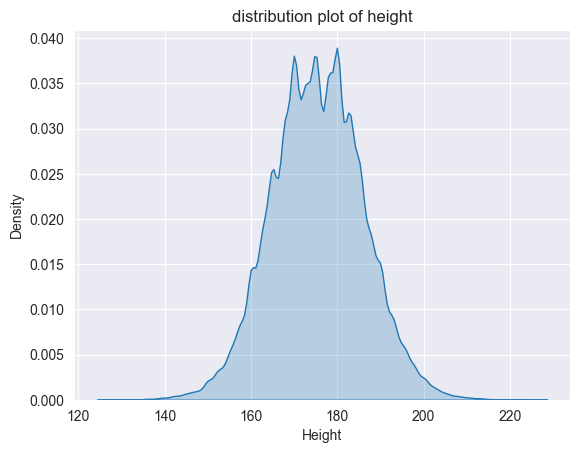

In [44]:
# kde plot

sns.kdeplot(athletes['Height'], fill=True)
plt.title("distribution plot of height")
plt.show()

Height is Normally distributed

In [45]:
# skewness of the height
print(f"skewness of the height column: {athletes['Height'].skew()}")

skewness of the height column: 0.01847729823426926


We can observe that, skewness is nearly to 0

So data is normally distributed

In [46]:
# null values in the height column
print(f"number of null values in height column is : {athletes['Height'].isnull().sum()}")
print(f"percentage of null values in height column : {round(athletes['Height'].isnull().sum()/len(athletes['Height'])*100, 2)}%")

number of null values in height column is : 60171
percentage of null values in height column : 22.19%


There are 60171 null values in the height

These null values can be replaced with the mean value (since data is mostly normally distributed)

### **Weight**

In [47]:
#describing the weight (in kgs)
athletes['Weight'].describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

* min weight is: 25 kg
* max weight is: 214 kg
* mean weight is: 70 kg
* more than 75% athletes are: <= 79 kg

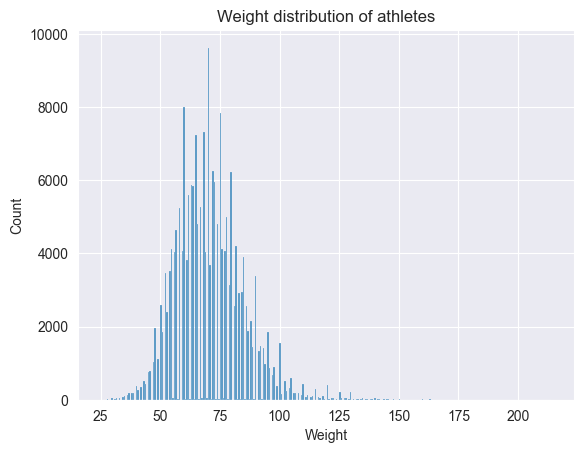

In [48]:
# distribution of weight

sns.histplot(athletes['Weight'])
plt.title("Weight distribution of athletes")
plt.show()

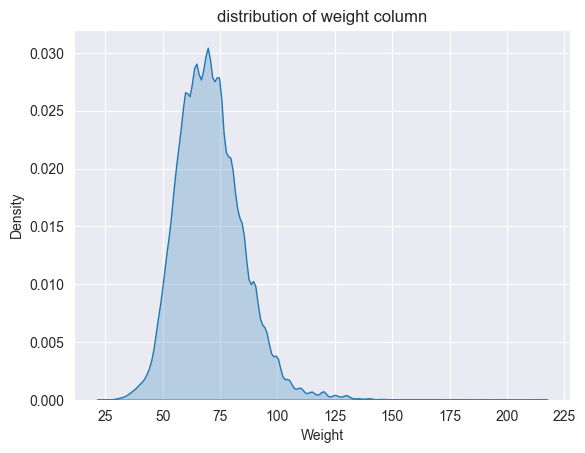

In [49]:
## kde plot

sns.kdeplot(athletes['Weight'], fill = True)
plt.title("distribution of weight column")
plt.show()

In [50]:
# skewness

print(f"skewness of the weight column is : {athletes['Weight'].skew()}")

skewness of the weight column is : 0.7971690270264294


Weight is nearly normally distributed

In [51]:
# null values in the weight column

print(f"number of null values in weight column is : {athletes['Weight'].isnull().sum()}")
print(f"percentage of null values in weight column : {round(athletes['Weight'].isnull().sum()/len(athletes['Weight'])*100, 2)}%")

number of null values in weight column is : 62875
percentage of null values in weight column : 23.19%


23% of the weights data is filled with null values

So these null values can be filled with mean value/median value (as data is normally distributed)

### **Team**

In [52]:
#Dtype and value counts of the team

athletes['Team'].dtype

dtype('O')

In [53]:
# value count of each Team

athletes['Team'].value_counts()

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Danzig               1
Hamburg              1
Formosa              1
Camille              1
Cuxhaven             1
Name: count, Length: 1184, dtype: int64

* There are 1184 unique teams participated
* United States team participated mostly in the olympics

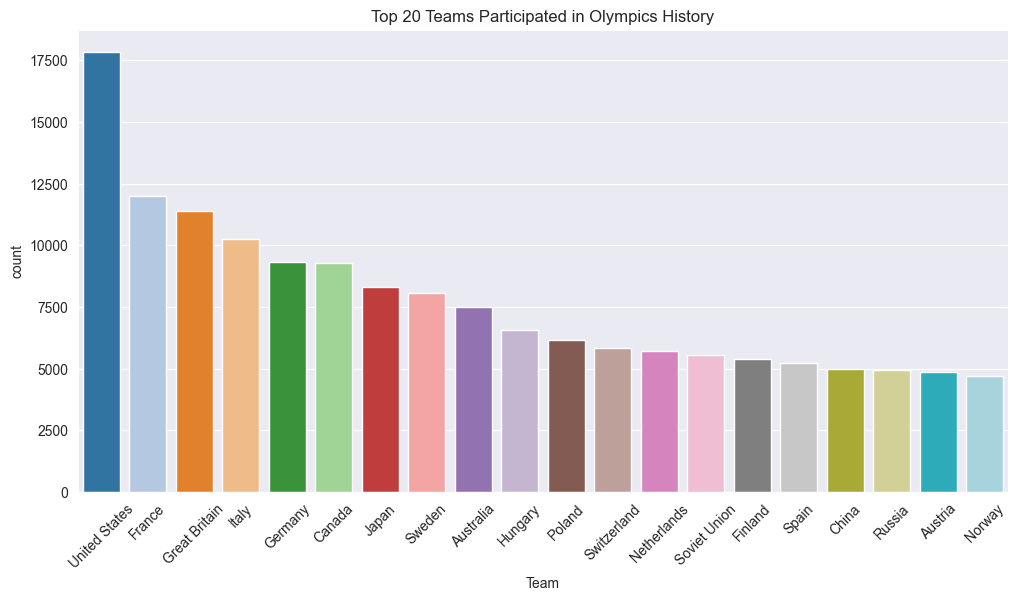

In [54]:
# visulalizing top 20 teams

teams_count = athletes['Team'].value_counts().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=teams_count,
    x='Team',
    y='count',
    palette='tab20'
)
plt.title("Top 20 Teams Participated in Olympics History")
plt.xticks(rotation=45)
plt.show()

In [55]:
#null values in the team column

print(f"number of null values in team column is : {athletes['Team'].isnull().sum()}")
print(f"percentage of null values in team column : {round(athletes['Team'].isnull().sum()/len(athletes['Team'])*100, 2)}%")

number of null values in team column is : 0
percentage of null values in team column : 0.0%


There are no null values in the team column

In [56]:
# teams that participated only one time in the history of olympics

teams_count = athletes['Team'].value_counts().sort_values(ascending=False).reset_index()

one_time_teams = teams_count[teams_count['count'] == 1]

print(f"Total number of teams that were participated only one time in olympics is: {one_time_teams.shape[0]}")
print(f"Those teams are :")

for index,data in one_time_teams.iterrows():
  print(data['Team'], end = " -> ")

Total number of teams that were participated only one time in olympics is: 103
Those teams are :
Brandenburg -> Freia-19 -> Satchmo -> Mainz -> Solos Carex -> Dow Jones -> Digby -> Salinero -> Brentina -> Nan-2 -> Hannover -> Jeanette-25 -> Jeannette-18 -> Turquoise-1 -> Nadine -> Ducky-16 -> Gyp-23 -> Gyp-6 -> Pirouette-31 -> Crocodile-13 -> Leipzig -> Alcyon-6 -> Suzon IV-39 -> Mascaret-28 -> Rostock -> Heidelberg -> Nrnberg -> Bonaparte -> Mythilus -> Rambo -> Floresco -> Souriceau-38 -> Marsouin-26 -> Marsouin-8 -> Clearwater -> Angerburg -> Dick-8 -> Laurea-1 -> Lbeck -> Lancet -> Whisper -> Knigsberg -> Don Schufro -> Colette-10 -> Pop Art -> Bremen -> Quando Quando -> Essen -> Cinara-13 -> Baby-9 -> Femur-18 -> Femur-1 -> Newfoundland -> Augsburg -> Dresden -> Mignon-29 -> Oxalis -> Hb-24 -> Hb-20 -> Diabolo St Maurice -> Ravel -> Kln -> Demi-Mondaine-15 -> Demi-Mondaine-17 -> Notavel -> Galopin De La Font -> Souvenance -> Crabe I-11 -> Crabe I-3 -> Crabe I-2 -> Plume-patte-32 -

In [57]:
# number of times india participated in the olympics

teams_count = athletes['Team'].value_counts().sort_values(ascending=False).reset_index()

teams_count[teams_count['Team'] == 'India']


,Team,count
42,India,1400


India totally participated 1400 times as team in the history of olympics form 1896 to 2016

### **NOC**

It is the National Olympic committee

Each country participating in the Olympic Games has its own NOC

As there are 1184 unique teams participating. So there should be 1184 NOCs should be there

In [58]:
print(f"Number of unique NOC participating in the olympics is: {athletes['NOC'].nunique()}")
print(f"Number of uique Teams participating in the olympics is: {athletes['Team'].nunique()}")

Number of unique NOC participating in the olympics is: 230
Number of uique Teams participating in the olympics is: 1184


Here my assumption is worng,

Because, there may be many team names under a particular NOC.

NOC is standard but Team is not standard (it varies)

In [59]:
# number of Teams under each NOC

NOC_teams_count = athletes.groupby('NOC')['Team'].nunique().sort_values(ascending = False).reset_index()

In [60]:
# region name for NOC

NOC_teams_count = NOC_teams_count.merge(regions, on = 'NOC', how = 'left')

In [61]:
print("Top 10 NOCs that has more teams count")
NOC_teams_count.head(10)

Top 10 NOCs that has more teams count


,NOC,Team,region,notes
0,FRA,160,France,NaN
1,USA,97,USA,NaN
2,GBR,96,UK,NaN
3,SWE,52,Sweden,NaN
4,NOR,46,Norway,NaN
5,GER,43,Germany,NaN
6,ITA,36,Italy,NaN
7,CAN,32,Canada,NaN
8,DEN,29,Denmark,NaN
9,GRE,29,Greece,NaN


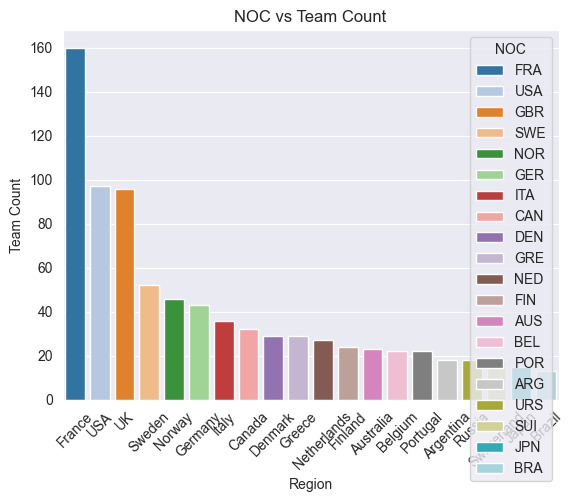

In [62]:
# Teams count bar graph under each NOC (top 20 NOCs)

sns.barplot(
    data=NOC_teams_count.head(20),
    x='region',
    y='Team',
    hue='NOC',
    dodge=False,
    palette='tab20'
)
plt.title("NOC vs Team Count")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Team Count")
plt.show()


In [63]:
# Number of teams under India also NOC of India

NOC_teams_count[NOC_teams_count['region'] == 'India']

,NOC,Team,region,notes
62,IND,3,India,NaN


In [64]:
# getting the team names of india

print("The Team names of India are: ")
athletes[athletes['NOC'] == 'IND']['Team'].unique()

The Team names of India are: 


array(['India', 'India-1', 'India-2'], dtype=object)

In [65]:
# Null values in the NOC data

print(f"number of null values in NOC column is : {athletes['NOC'].isnull().sum()}")
print(f"percentage of null values in NOC column : {round(athletes['NOC'].isnull().sum()/len(athletes['NOC'])*100, 2)}%")

number of null values in NOC column is : 0
percentage of null values in NOC column : 0.0%


There are no null values in the NOC column

Also, there are 230 countries participated in the olympics history upto 2016

### **Year**

In [66]:
# describing the year
athletes['Year'].describe()

count    271116.000000
mean       1978.378480
std          29.877632
min        1896.000000
25%        1960.000000
50%        1988.000000
75%        2002.000000
max        2016.000000
Name: Year, dtype: float64

* started olympic held year is: 1896
* recent olympic held year is: 2016

In [67]:
# Null values in the Year data

print(f"number of null values in Year column is : {athletes['Year'].isnull().sum()}")
print(f"percentage of null values in Year column : {round(athletes['Year'].isnull().sum()/len(athletes['Year'])*100, 2)}%")

number of null values in Year column is : 0
percentage of null values in Year column : 0.0%


There are no null values in the Year column

### **Season**

In [68]:
# unique values of the season are

athletes['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

There are two seasons in the olympics
* Winter olympics
* Summer olympics

In [69]:
# number of summer and winter olympics held from year 1896 to 2016

season_count = athletes['Season'].value_counts().reset_index()

season_count.columns = ['Season', 'season_count']

season_count

,Season,season_count
0,Summer,222552
1,Winter,48564


We can observe that, compared to winter olympics, summer olympics held morely

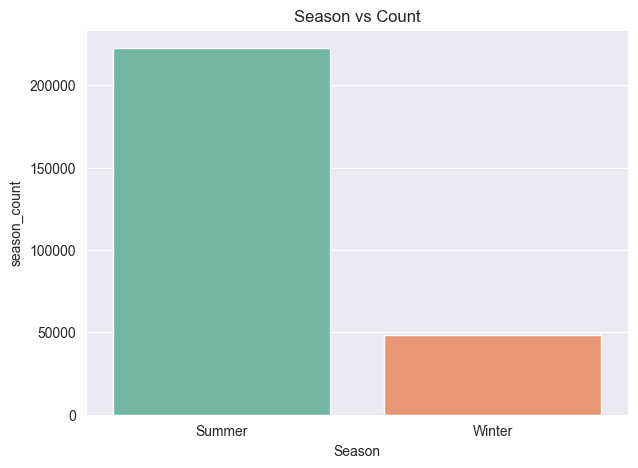

In [70]:
# vusualising using bar plot

plt.figure(figsize=(7, 5))
sns.barplot(
    data=season_count,
    x='Season',
    y='season_count',
    palette='Set2'
)
plt.title("Season vs Count")
plt.show()

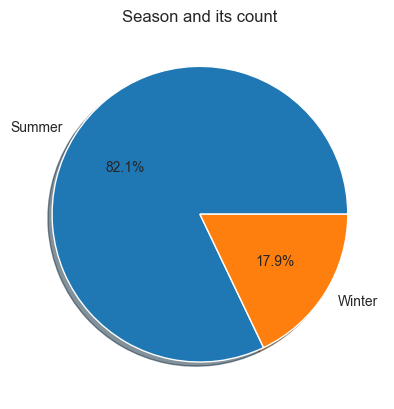

In [71]:
# we can also compare by using pie chart

plt.pie(season_count['season_count'], labels=season_count['Season'], shadow = True, autopct='%1.1f%%')
plt.title('Season and its count')
plt.show()

upon total olympics held
* 82% summer olympics held
* 18% winter olympics held

In [72]:
# Null values in the Season data

print(f"number of null values in Season column is : {athletes['Season'].isnull().sum()}")
print(f"percentage of null values in Season column : {round(athletes['Season'].isnull().sum()/len(athletes['Season'])*100, 2)}%")

number of null values in Season column is : 0
percentage of null values in Season column : 0.0%


There are no null values exist in the season column

### **Games**

* It is the combination of Year + season column
* so there should be no null values in this column too

In [73]:
# Null values in the Games data

print(f"number of null values in Games column is : {athletes['Games'].isnull().sum()}")
print(f"percentage of null values in Games column : {round(athletes['Games'].isnull().sum()/len(athletes['Games'])*100, 2)}%")

number of null values in Games column is : 0
percentage of null values in Games column : 0.0%


In [74]:
# we can observe that, from the before 1992, and after 1992, the olympics timing are changed

unique_data = athletes.sort_values('Year', ascending = True)['Games'].unique()

In [75]:
unique_data

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

We can observe that
* from 1896 to 1924, only summer olympics held.
* upto 1992, for every 4 years summer, winter olympics held(in the same 4th year).
* from 1992, alternatively for every 2 years one season has happened.

By observing that,

We can confirm that, summer olympics should be more that winter olympics

### **City**

It represents, in which city does the olympic held form 1896 to 2016

In [76]:
# unique values of the city column

print(f"Number of cities in which olympics held (1896 to 2016): {athletes['City'].nunique()}")

Number of cities in which olympics held (1896 to 2016): 42


In [77]:
# cities list

cities = athletes['City'].unique()
for city in cities:
  print(city)

Barcelona
London
Antwerpen
Paris
Calgary
Albertville
Lillehammer
Los Angeles
Salt Lake City
Helsinki
Lake Placid
Sydney
Atlanta
Stockholm
Sochi
Nagano
Torino
Beijing
Rio de Janeiro
Athina
Squaw Valley
Innsbruck
Sarajevo
Mexico City
Munich
Seoul
Berlin
Oslo
Cortina d'Ampezzo
Melbourne
Roma
Amsterdam
Montreal
Moskva
Tokyo
Vancouver
Grenoble
Sapporo
Chamonix
St. Louis
Sankt Moritz
Garmisch-Partenkirchen


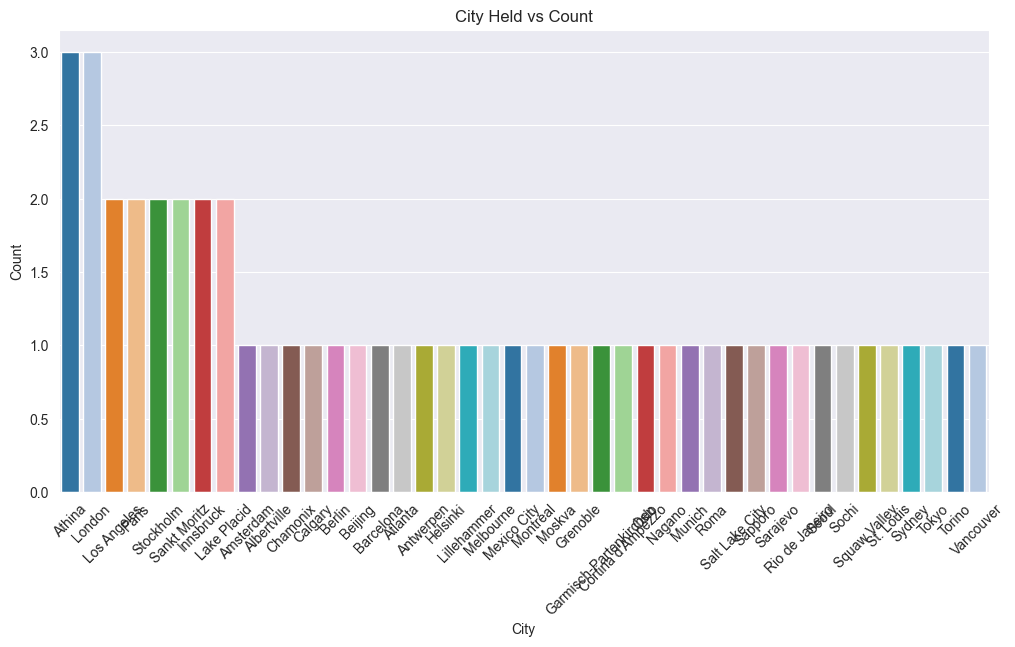

In [78]:
# frequency of olympic held cities

data = athletes.groupby('City')['Year'].nunique().sort_values(ascending = False).reset_index()
data.columns = ['City_held', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='City_held',
    y='count',
    palette='tab20'
)
plt.title("City Held vs Count")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

Most of the times, olympics held in 'Athina'

In [79]:
# Null values in the City data

print(f"number of null values in City column is : {athletes['City'].isnull().sum()}")
print(f"percentage of null values in City column : {round(athletes['City'].isnull().sum()/len(athletes['City'])*100, 2)}%")

number of null values in City column is : 0
percentage of null values in City column : 0.0%


There are no null values in the city column

### **Sport**

In [80]:
# Number of unique sports held in the entier olympics

print(f"Number of unique sports held in olympics (1896 to 2016): {athletes['Sport'].nunique()}")

Number of unique sports held in olympics (1896 to 2016): 66


So, entirely 66 sports has been held

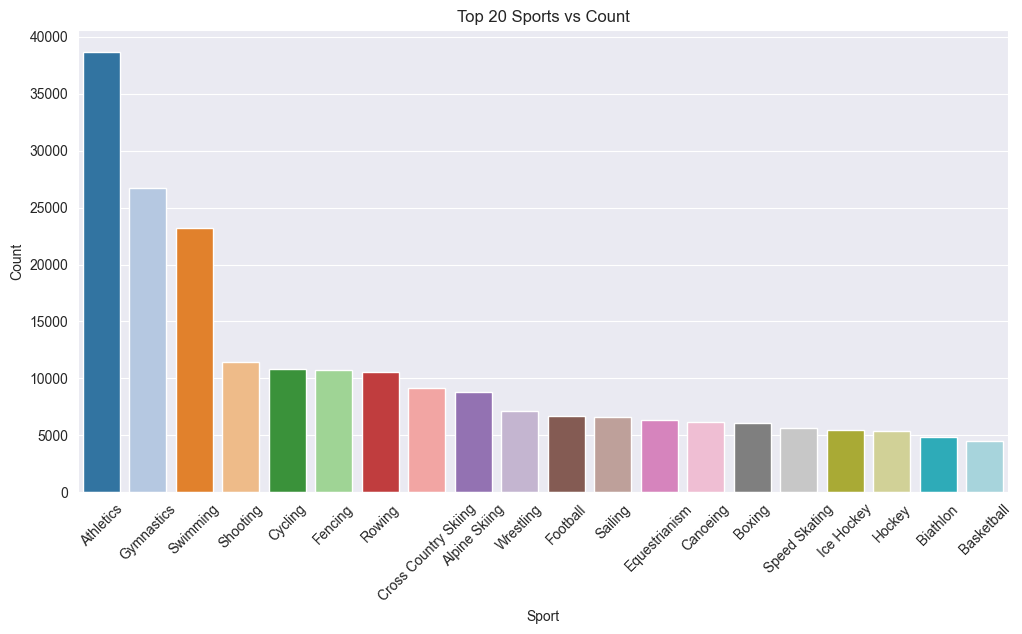

In [81]:
# frequency of each sport

sports_frequency = athletes['Sport'].value_counts().sort_values(ascending = False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sports_frequency.head(20),
    x='Sport',
    y='count',
    palette='tab20'
)
plt.title("Top 20 Sports vs Count")
plt.xticks(rotation=45)
plt.xlabel("Sport")
plt.ylabel("Count")
plt.show()

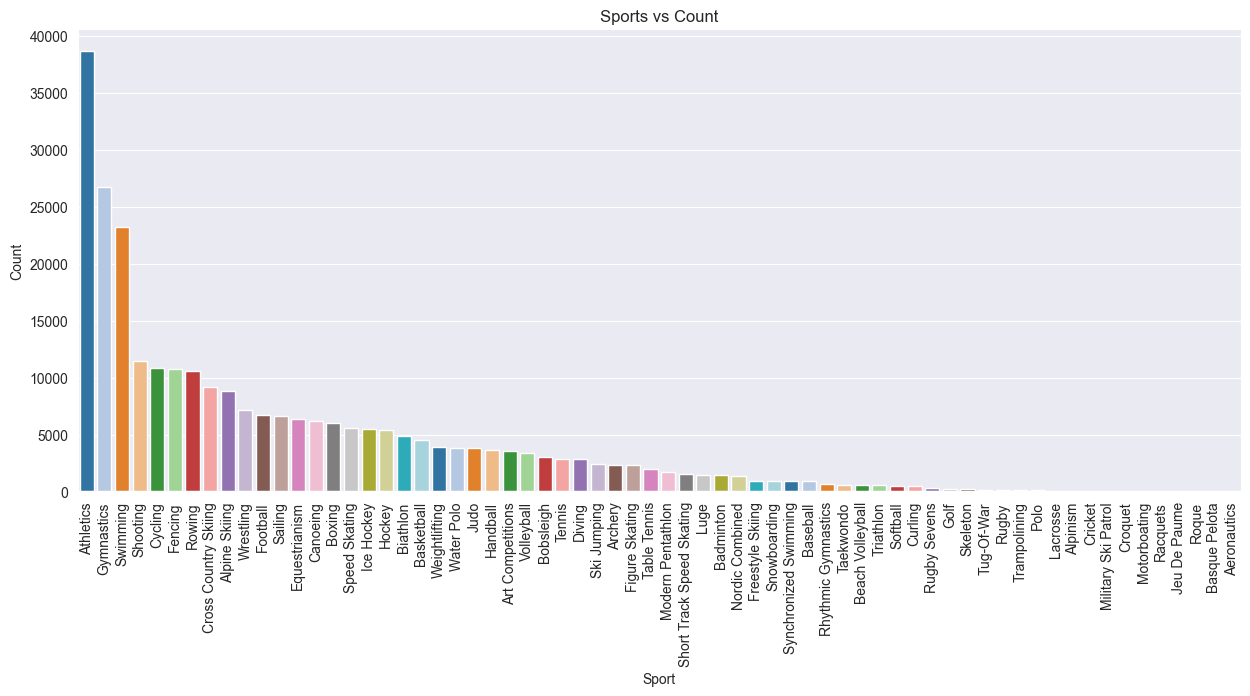

In [82]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=sports_frequency,
    x='Sport',
    y='count',
    palette='tab20'
)
plt.title("Sports vs Count")
plt.xticks(rotation=90)
plt.xlabel("Sport")
plt.ylabel("Count")
plt.show()

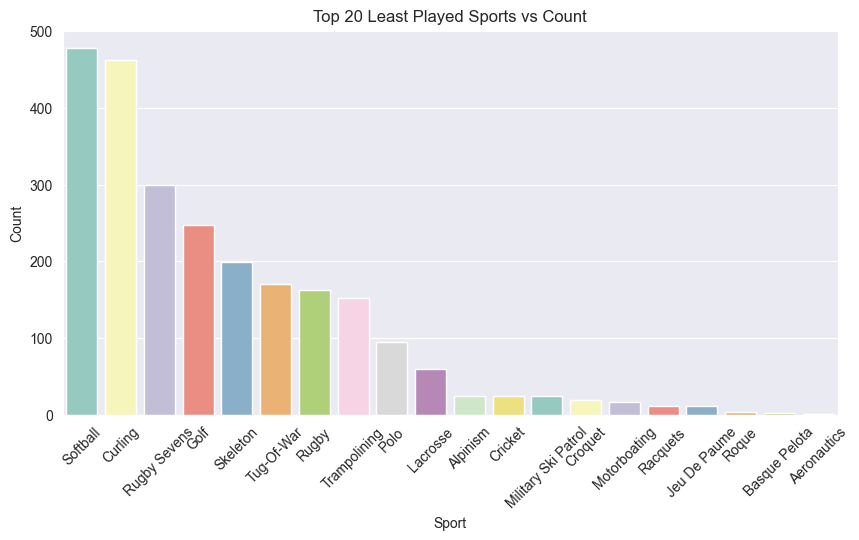

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=sports_frequency.tail(20),
    x='Sport',
    y='count',
    palette='Set3'
)
plt.title("Top 20 Least Played Sports vs Count")
plt.xticks(rotation=45)
plt.xlabel("Sport")
plt.ylabel("Count")
plt.show()

### **Event**

In each sport there may be many number of events

In [84]:
# total number of unique events held

print(f"Total unique events held in olympics(1896 to 2016): {athletes['Event'].nunique()}")

Total unique events held in olympics(1896 to 2016): 765


So there are at total, 765 events has been held

In [85]:
# events in each sport

event_sports = athletes.groupby('Sport')['Event'].unique()

event_sports

Sport
Aeronautics                           [Aeronautics Mixed Aeronautics]
Alpine Skiing       [Alpine Skiing Men's Downhill, Alpine Skiing M...
Alpinism                                    [Alpinism Mixed Alpinism]
Archery             [Archery Women's Individual, Archery Men's Ind...
Art Competitions    [Art Competitions Mixed Sculpturing, Unknown E...
                                          ...                        
Tug-Of-War                              [Tug-Of-War Men's Tug-Of-War]
Volleyball          [Volleyball Men's Volleyball, Volleyball Women...
Water Polo          [Water Polo Men's Water Polo, Water Polo Women...
Weightlifting       [Weightlifting Women's Super-Heavyweight, Weig...
Wrestling           [Wrestling Men's Light-Heavyweight, Greco-Roma...
Name: Event, Length: 66, dtype: object

In [86]:
# counts of events in each sport

event_sport_count = athletes.groupby('Sport')['Event'].nunique().sort_values(ascending=False).reset_index()

event_sport_count

,Sport,Event
0,Shooting,83
1,Athletics,83
2,Swimming,55
3,Cycling,44
4,Sailing,38
...,...,...
61,Polo,1
62,Roque,1
63,Rugby,1
64,Softball,1


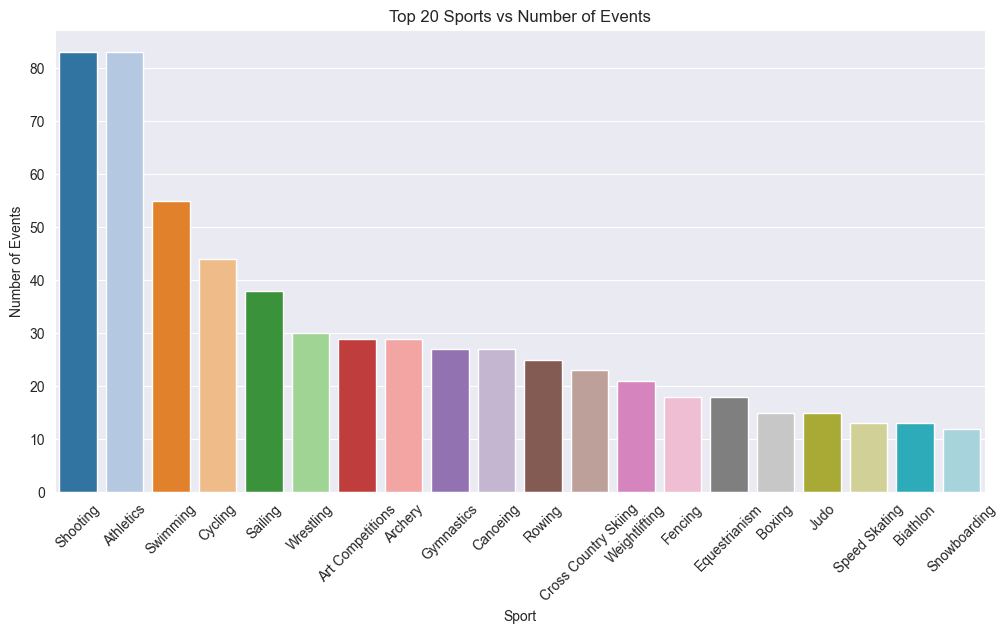

In [88]:
# plotting top 20 events grouped by sports

plt.figure(figsize=(12, 6))
sns.barplot(
    data=event_sport_count.head(20),
    x='Sport',
    y='Event',
    palette='tab20'
)
plt.title("Top 20 Sports vs Number of Events")
plt.xticks(rotation=45)
plt.xlabel("Sport")
plt.ylabel("Number of Events")
plt.show()

In [89]:
# 83 Events in Shooting

event_sports['Shooting']

array(["Shooting Men's Small-Bore Rifle, Prone, 50 metres",
       "Shooting Men's Rapid-Fire Pistol, 25 metres",
       "Shooting Men's Trap", 'Shooting Mixed Skeet',
       'Shooting Mixed Trap', "Shooting Men's Air Rifle, 10 metres",
       "Shooting Men's Free Pistol, 50 metres",
       "Shooting Men's Air Pistol, 10 metres",
       "Shooting Women's Air Rifle, 10 metres", "Shooting Men's Skeet",
       "Shooting Men's Small-Bore Rifle, Three Positions, 50 metres",
       "Shooting Women's Air Pistol, 10 metres",
       "Shooting Women's Sporting Pistol, 25 metres",
       "Shooting Men's Running Target, 50 metres",
       "Shooting Men's Free Rifle, Three Positions, 300 metres",
       "Shooting Men's Military Rifle, Three Positions, 300 metres",
       "Shooting Men's Military Rifle, Any Position, 600 metres",
       "Shooting Men's Military Rifle, 200, 400, 500 and 600 metres, Team",
       "Shooting Men's Military Rifle, Prone, 300 metres",
       "Shooting Men's Military Rifle

### **Finding Null valued columns**

In [90]:
athletes.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

Gives us which columns contain null values
* "Age, Height, Weight, Medal, region, notes" has null values

In [91]:
# getting the null value count for each column

athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

It gives the number of null values in each column
* Age --- 9474
* Height --- 60171
* weight --- 62875
* Medal --- 231333
* region --- 370
* notes -- 266077

In [92]:
# India details

athletes.query('Team == "India"').head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN


In [93]:
# getting all the India data who participated in olympics

india_data = athletes.query('Team == "India"')

print("Number of records from india:", india_data.shape[0])

Number of records from india: 1400


In [94]:
# Japan details

athletes.query('Team == "Japan"').head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN


In [95]:
japan_data = athletes.query('Team == "Japan"')

print("Number of records from india:", japan_data.shape[0])

Number of records from india: 8289


In [96]:
# top_countries_participated

top_10_countries = athletes["Team"].value_counts().sort_values(ascending = False).head(10).reset_index()

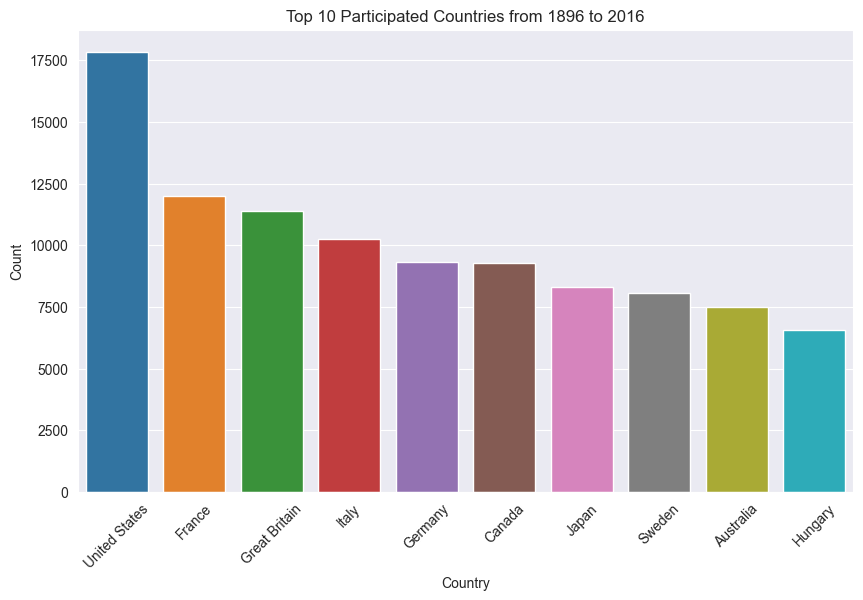

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_countries,
    x='Team',
    y='count',
    palette='tab10'
)
plt.title("Top 10 Participated Countries from 1896 to 2016")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [98]:
# winter olympic sports

winter_sports = athletes[athletes['Season'] == "Winter"]['Sport'].unique()

print(f"The winter sports are :\n")
for sport in winter_sports:
    print(sport)

The winter sports are :

Speed Skating
Cross Country Skiing
Ice Hockey
Biathlon
Alpine Skiing
Luge
Bobsleigh
Figure Skating
Nordic Combined
Freestyle Skiing
Ski Jumping
Curling
Snowboarding
Short Track Speed Skating
Skeleton
Military Ski Patrol
Alpinism


In [99]:
# summer olympic sports

summer_sports = athletes[athletes['Season'] == "Summer"]['Sport'].unique()

print(f"The summer sports are : \n")
for sport in summer_sports:
    print(sport)

The summer sports are : 

Basketball
Judo
Football
Tug-Of-War
Athletics
Swimming
Badminton
Sailing
Gymnastics
Art Competitions
Handball
Weightlifting
Wrestling
Water Polo
Hockey
Rowing
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Baseball
Rhythmic Gymnastics
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Rugby
Lacrosse
Polo
Cricket
Ice Hockey
Racquets
Motorboating
Croquet
Figure Skating
Jeu De Paume
Roque
Basque Pelota
Alpinism
Aeronautics


In [100]:
#number of unique olympic sports

print("The total number of unique olympic sports are:", athletes["Sport"].nunique())

The total number of unique olympic sports are: 66


In [101]:
print(f"Total summer sports are : {len(summer_sports)}")
print(f"Total winter sports are : {len(winter_sports)}")

Total summer sports are : 52
Total winter sports are : 17


In [102]:
# sports that were played in both summer and winter

common = set(winter_sports).intersection(set(summer_sports))
print("The sports that were common in winter and summer olypics are:")
for sport in common:
    print(sport)

The sports that were common in winter and summer olypics are:
Alpinism
Ice Hockey
Figure Skating


Males participated more that double times than females

In [103]:
# total medals

athletes['Medal'].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [106]:
# Number of female athletes in each olympics

female_summer = athletes[(athletes['Sex'] == 'F')&(athletes['Season'] == 'Summer')][['Sex', 'Year']]
female_summer = female_summer.groupby('Year').count().reset_index()
female_summer.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


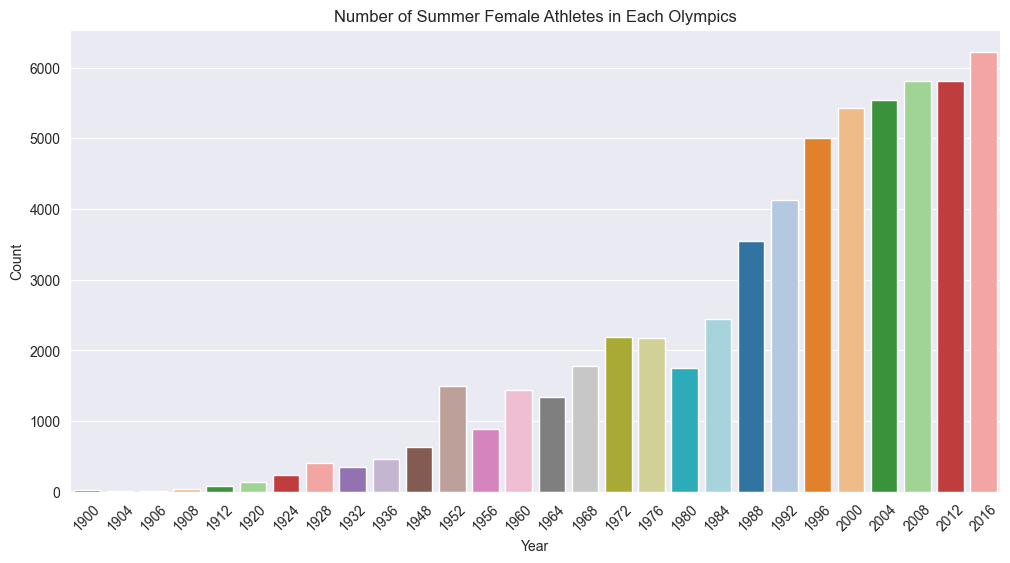

In [107]:
# bar plot

female_summer['Year'] = female_summer['Year'].astype('str')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=female_summer,
    x='Year',
    y='Sex',
    palette='tab20'
)
plt.title("Number of Summer Female Athletes in Each Olympics")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

As year increases, the number of female participants in summer olympics were increased
* Also females started in summer olympics from the year 1900

In [108]:
female_winter = athletes[(athletes['Sex'] == 'F')&(athletes['Season'] == 'Winter')][['Sex', 'Year']]
female_winter = female_winter.groupby('Year').count().reset_index()
female_winter.head()

,Year,Sex
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133


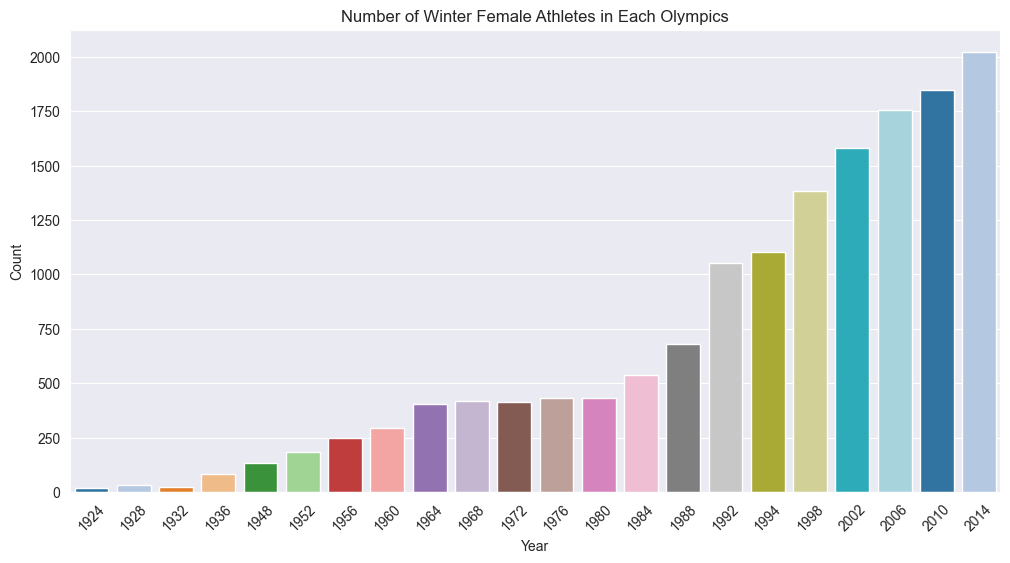

In [109]:
# bar plot

female_winter['Year'] = female_winter['Year'].astype('str')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=female_winter,
    x='Year',
    y='Sex',
    palette='tab20'
)
plt.title("Number of Winter Female Athletes in Each Olympics")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Females started their winter olympics participation from the year 1924

As the olympics years passes, the number of womens participation also increases

By comparing the both graphs, we can observe that, from the year 1992, winter and summer olympics were seperated.

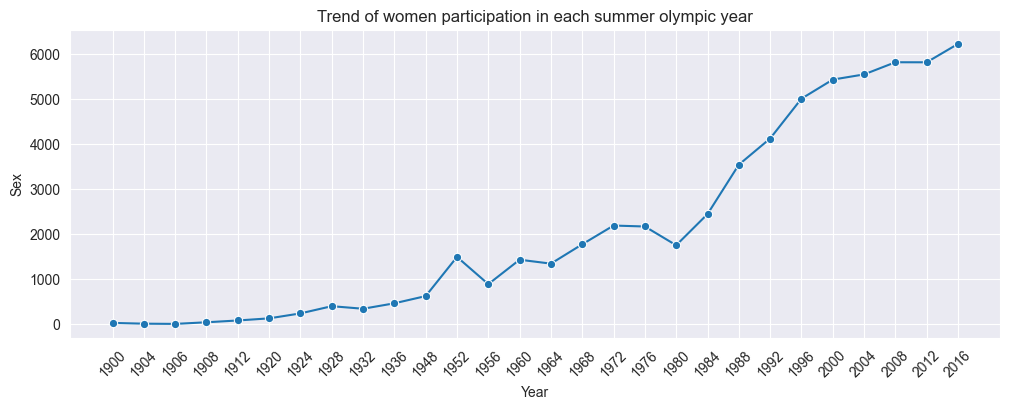

In [116]:
# we can also observe the women participation increaseness from the line graph

plt.figure(figsize=(12, 4))
sns.lineplot(
    data = female_summer,
    x = "Year",
    y = "Sex",
    marker = 'o'
)
plt.title("Trend of women participation in each summer olympic year")
plt.xticks(rotation=45)
plt.show()

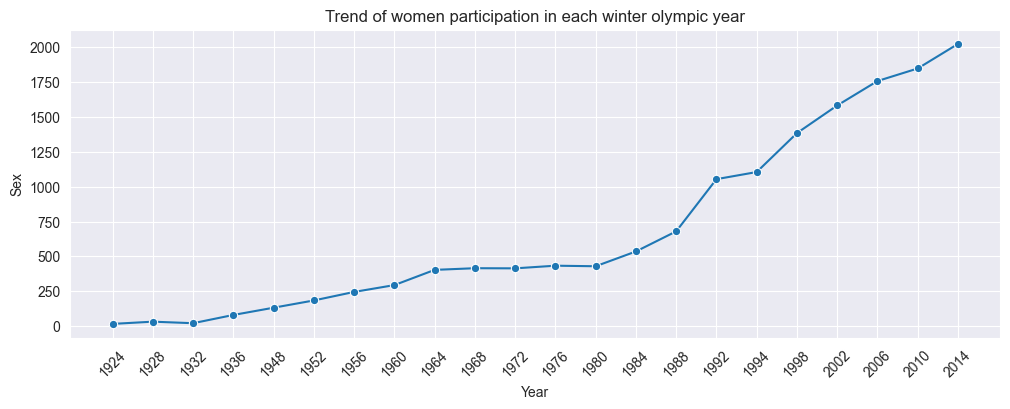

In [117]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    data = female_winter,
    x = "Year",
    y = "Sex",
    marker = 'o'
)
plt.title("Trend of women participation in each winter olympic year")
plt.xticks(rotation=45)
plt.show()

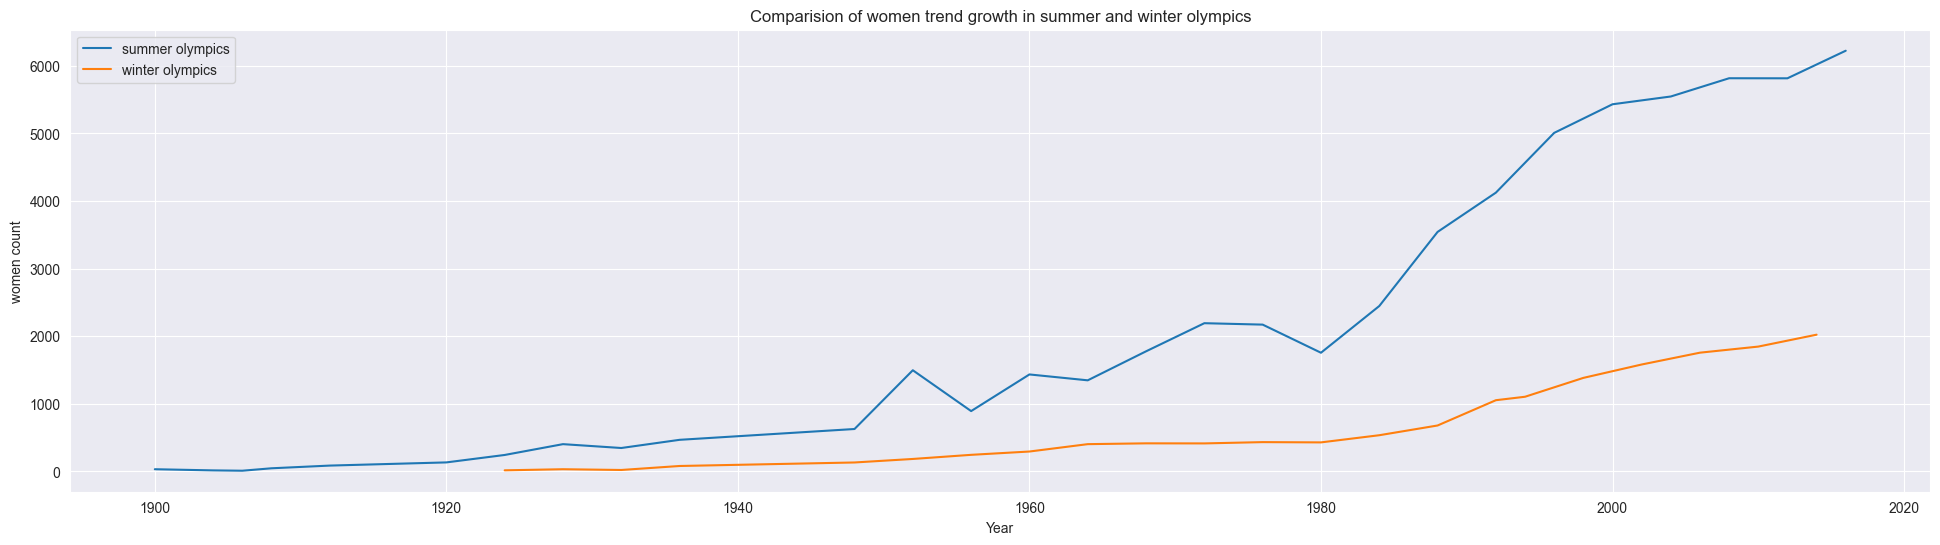

In [118]:
female_summer['Year'] = female_summer['Year'].astype(int)
female_winter['Year'] = female_winter['Year'].astype(int)

plt.figure(figsize = (24, 6))
sns.lineplot(data = female_summer, x = "Year", y = "Sex", label = "summer olympics")
sns.lineplot(data = female_winter, x = "Year", y = "Sex", label = "winter olympics")
plt.title("Comparision of women trend growth in summer and winter olympics")
plt.xlabel('Year')
plt.ylabel('women count')
plt.legend()
plt.show()

In [122]:
# gold medal atheletes

goldMedals = athletes[athletes['Medal'] == 'Gold']

In [123]:
 # taking only values that are different from nan

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [124]:
# goldMedals secured persons beyond the age of 60

goldMedals[goldMedals['Age']>60]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
104003,52626,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
226374,113773,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
233390,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN
261102,130662,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN


In [125]:
print(f"Number of people who got gold medals for age > 60: {goldMedals[goldMedals['Age']>60].shape[0]}")

Number of people who got gold medals for age > 60: 6


In [126]:
# knowing the sport events, in which the gold medal is got for age > 60

sporting_event = goldMedals['Sport'][goldMedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

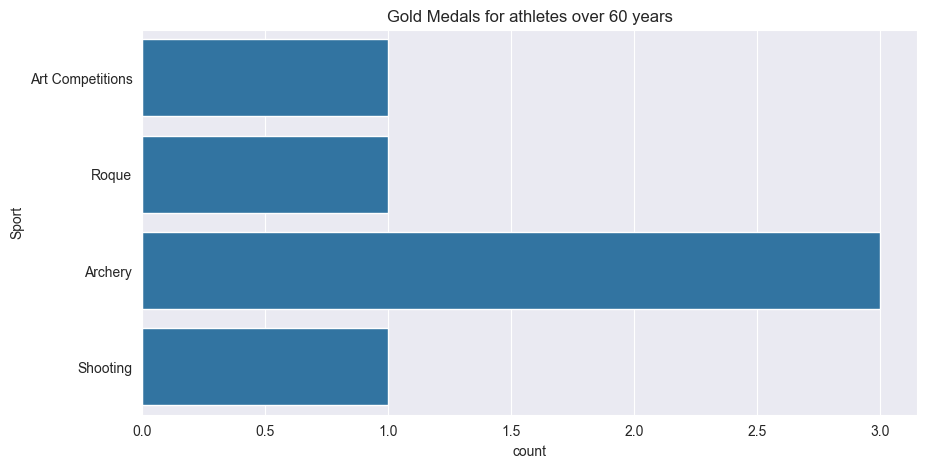

In [127]:
# ploting the sport event

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for athletes over 60 years')
plt.show()

In [128]:
# Gold medals from each country

gold_country = goldMedals.groupby('region')['ID'].count().sort_values(ascending = False).reset_index()

In [129]:
gold_country

,region,ID
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
...,...,...
92,Peru,1
93,Syria,1
94,Tajikistan,1
95,United Arab Emirates,1


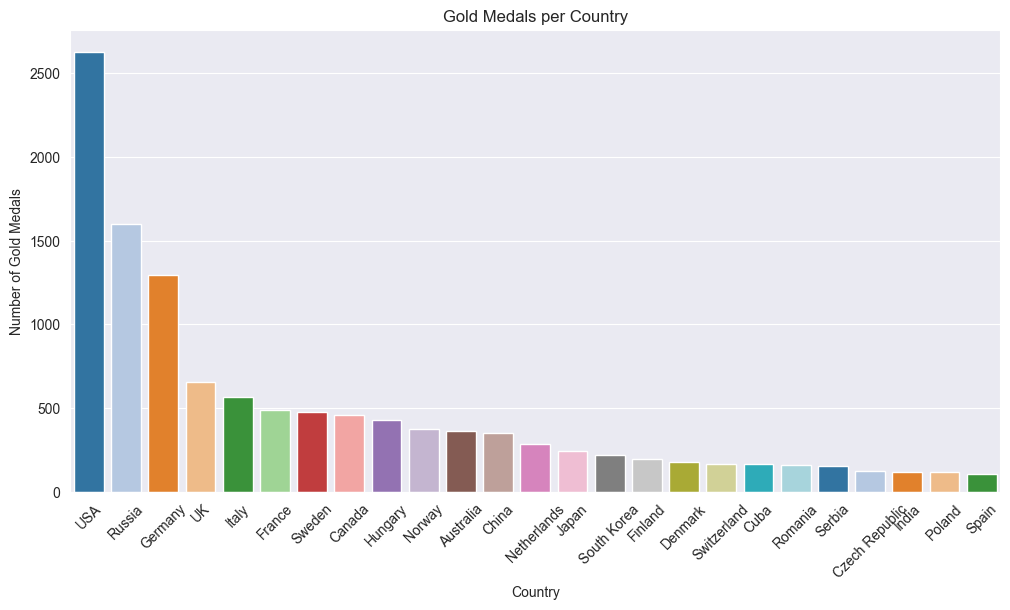

In [133]:
# bar plot

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gold_country.iloc[:25],
    x='region',
    y='ID',
    palette='tab20'
)
plt.title("Gold Medals per Country")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Gold Medals")
plt.show()

In [134]:
# Rio lympics gold medal winners

max_year = athletes.Year.max()

team_names = athletes[(athletes.Year == max_year) & (athletes.Medal == 'Gold')].Team

team_names.value_counts().head()


Team
United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Name: count, dtype: int64

In Rio olympics, US won most gold medals

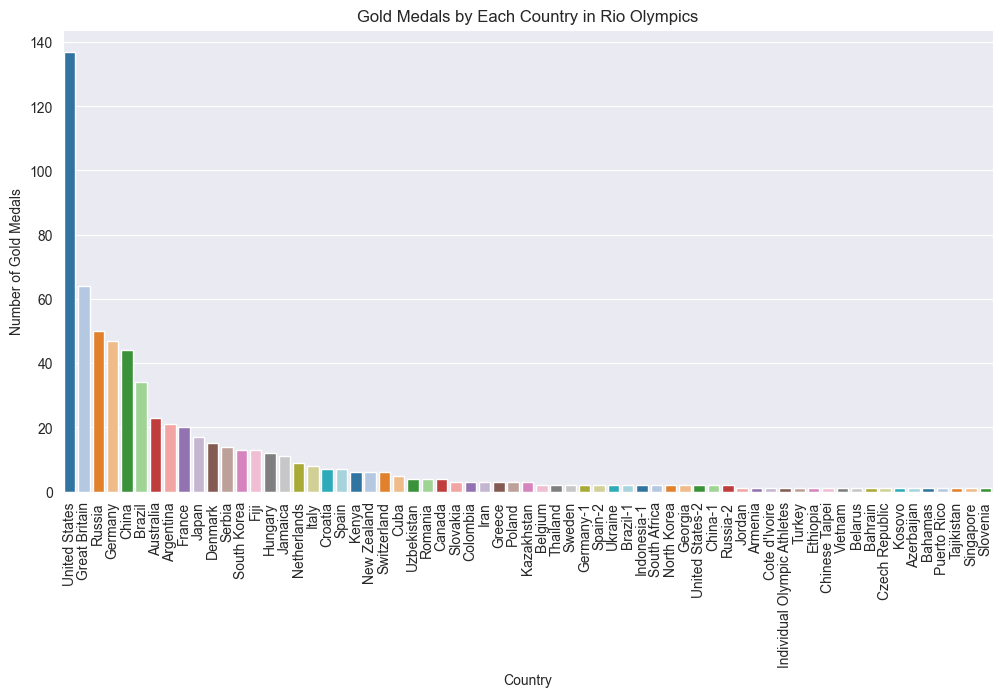

In [136]:
team_counts = team_names.value_counts().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=team_counts,
    x='Team',
    y='count',
    palette='tab20'
)
plt.title("Gold Medals by Each Country in Rio Olympics")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Gold Medals")
plt.show()

In [138]:
# Height vs Weight plot

not_null = athletes[(athletes['Height'].notnull()) & (athletes['Weight'].notnull())]

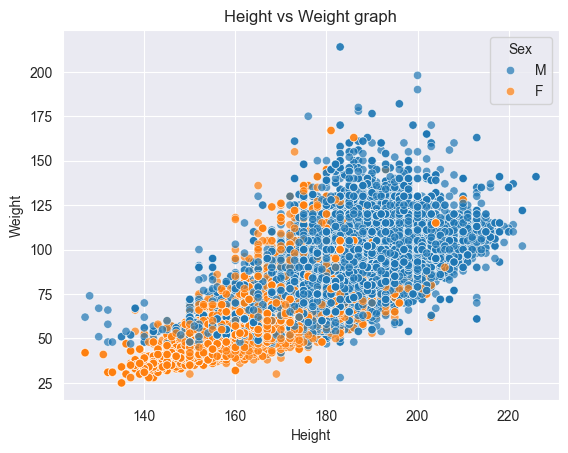

In [140]:
sns.scatterplot(
    data = not_null,
    x = "Height",
    y = "Weight",
    hue = "Sex",
    alpha = 0.7
)
plt.title("Height vs Weight graph")
plt.show()